In [84]:
# 提示:
# 使用numpy创建一个3x3的array, 初始元素为0

import numpy as np 
def create_board():
    return np.zeros((3,3))
    
board = create_board()
board

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [85]:
# 提示:
# 
# 1.定义一个函数 place(board, player, position)
# player：代表当前玩家(一个1或2的整数，表示玩家1或2)
# position:一个tuple,表示想要落子的坐标位置
# 只有当position位置未被占用，方能落子，落子后将position位置
# 换成player的值
#
# 2.使用create_board()创建棋盘board,
# 并调用place将玩家1放置到(0,0)

def place(board, player, position):
    if board[position] == 0:
        board[position] = player
        
# 利用create_board()创建一个棋盘board
board = create_board()

#利用create_board()保存棋盘到变量board, 利用 place()使棋手1放置其自身的号码到位置(0, 0).
place(board, 1, (0,0))
# 打印出board.

In [86]:
# 提示:
# 建立一个函数possibilities(board),返
# 回棋盘上所有未被放置棋子的位置的一个序列(保存为元组).
def possibilities(board):
    
    index = np.where(board==0)
    all_p = []
    for i in range(index[0].shape[0]):
        temp = (index[0][i],index[1][i])
        all_p.append(temp)
    return all_p
    
possibilities(board)


[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [87]:
# 提示:
# 写一个函数random_place(board,player),随机地放置
# 玩家到可能的位置
import random

def random_place(board, player):
    selection = possibilities(board)
    position = random.choice(selection)
    place(board, player, position)
    
# 更新board   
random_place(board,2)
board

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 2.]])

In [88]:
board = create_board()
# 提示：
# 对玩家1和玩家2,调用random_place(board,player)
# 使分别放置3个棋子在棋盘board上.

random_place(board,1)
random_place(board,2)
random_place(board,1)
random_place(board,2)
random_place(board,1)
random_place(board,2)

# 打印出board
print(board)

[[1. 0. 2.]
 [1. 2. 0.]
 [0. 1. 2.]]


In [89]:
# 提示:
# 建立一个函数row_win(board, player)
# 判断如果任意一行满足都是player的标志
# 则返回True,否则返回False
def row_win(board, player):
    m = 3
    for i in range(m):
        if board[i][0] == board[i][1] and board[i][2] == board[i][1]:
            if board[i][0] == player:
                return True
    return False

print(row_win(board,1))

False


In [90]:
# 建立一个函数col_win(board, player)
# 判断如果任意一列满足都是player的标志
# 则返回True,否则返回False

def col_win(board, player):
    m = 3
    for i in range(m):
        if board[0][i] == board[1][i] and board[2][i] == board[1][i]:
            if board[0][i] == player:
                return True
    return False

print(col_win(board,1))

False


In [91]:
# 建立一个函数diag_win(board, player),
# 如果player赢,返回True, 否则False. 
# 可能要用到np.rot90()函数.

def diag_win(board, player):
    li = np.diag(board)
    if li[0] == li[1] and li[1] == li[2]:
        if li[0] == player:
            return True
        
    board_help = np.rot90(board)
    li = np.diag(board_help)
    if li[0] == li[1] and li[1] == li[2]:
        if li[0] == player:
            return True
    return False
            
diag_win(board,1)
# 打印出board
print(board)
print(diag_win(board,1))

[[1. 0. 2.]
 [1. 2. 0.]
 [0. 1. 2.]]
False


In [92]:
# 提示:
# 创建一个函数evaluate(board)
# 对玩家1,2，判断是否满足`row_win`, `col_win`, 或 `diag_win`
# 若满足，则保存玩家编号到winner
# 若无处落子但还未分出胜负则返回winner=-1
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply. 
        # If so, store `player` as `winner`.
        #===YOUR CODE=
        if row_win(board,player) or col_win(board,player) or \
        diag_win(board,player):
            winner = player 
        #============= 
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

evaluate(board)

0

In [93]:
# 提示:
# 创建一个函数play_game(),实现以下功能:
# 1.创建棋盘
# 2.轮流随机下棋子
# 3.每次落子后使用evaluate()判断输赢
# 4.持续游戏直到出现一个赢家或不可落子
# 5.返回winner:1,2,或-1(表示平局)

def play_game():
    board = create_board()
    winner = 0
    while not (np.all(board != 0) and winner == 0):
        for player in [1,2]:
            random_place(board,player)
            winner = evaluate(board)
            if winner != 0:
                return winner
    return winner

play_game()

1

0.33771181106567383


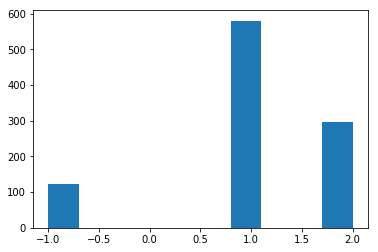

In [94]:
import time
import matplotlib.pyplot as plt

# 提示:实现下面的功能
# 1.玩1000次游戏
# 2.计算玩1000次游戏用的时间
# 3.统计1000次游戏的结果存在列表res中
# 4.使用plt.hist(res)观察结果的分布
# 并分析结果：
# 1.玩家1比玩家2赢的次数多吗?
# 2.二玩家赢的次数是否都比平局的次数多?
res = []
start = time.time()
for n in range(1000):
    res.append(play_game())
stop = time.time()
time_used = stop - start
print(time_used)
plt.hist(res);

In [95]:
# 提示:
# 编写一个函数play_strategic_game()，实现
# 1.player1先下，player第一次下在棋盘正中心位置,之后轮流随机落子
# 2.返回 winner

# 并调用一次play_strategic_game()

def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            # use `random_place` to play a game, and store as `board`.
            random_place(board,player)
            # use `evaluate(board)`, and store as `winner`.
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

play_strategic_game()

1

0.28874802589416504


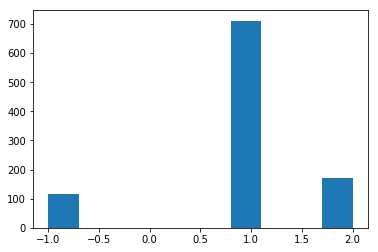

In [96]:
# 提示:实现下面的功能
# 1.使用play_strategic_game()玩1000次游戏
# 2.计算玩1000次游戏用的时间
# 3.统计1000次游戏的结果存在列表res中
# 4.使用plt.hist(res)观察结果的分布
# 和play_game()做对比，分析结果
# 1.玩家1是否表现得更好了？
# 2.二玩家赢的次数是否都比平局的次数多?
import time
res = []
start = time.time()
for n in range(1000):
    res.append(play_strategic_game())
stop = time.time()
time_used = stop - start
print(time_used)
plt.hist(res)
plt.show()